**Pandas** (alias `pd`) is a Python package providing fast, flexible, and expressive data
structures designed to make working with "labeled" data both
easy and intuitive. 

**`pd.DataFrame`** is a two-dimensional data structure with labeled axes, rows (`index`) and `column`. The data is often a `np.array`.

**`pd.Series`** is the one-dimensional version of the `pd.DataFrame`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Example ``DataFrame`` creation: 

In [2]:
kids = pd.DataFrame(columns=("height", "weight"), index=("Max", "Julia"), data=[[97, 23], [103, 21]])
print(kids)

       height  weight
Max        97      23
Julia     103      21


In [3]:
kids

,height,weight
Max,97,23
Julia,103,21


## creation from `dict`

In [4]:
dict_of_tests = {"linerate":   [6.2, 6.25, 6.3, 6.2, 6.25, 6.3, 6.2, 6.25, 6.2, 6.25],
                 "voltage":    [  3,    3,   3, 3.3,  3.3, 3.3,   3,    3, 3.3,  3.3],
                 "temperature":[ 25,   25,  25,  25,   25,  25,  40,   40,  40,   40],
                 "errors":     [ 12,    0,   0,   3,    0,   0, 234,   57,   0,    0],
                 "current":    [110,  115, 122, 121,  129, 136, 134,  145, 142,  155],
                 "PASS":       [False, True, True, False, True, True, False, False, True, False],
                 "comment":    ["", "", "", "", "", "ESD event", "", "", "", ""]}
dict_of_tests

{'PASS': [False, True, True, False, True, True, False, False, True, False],
 'comment': ['', '', '', '', '', 'ESD event', '', '', '', ''],
 'current': [110, 115, 122, 121, 129, 136, 134, 145, 142, 155],
 'errors': [12, 0, 0, 3, 0, 0, 234, 57, 0, 0],
 'linerate': [6.2, 6.25, 6.3, 6.2, 6.25, 6.3, 6.2, 6.25, 6.2, 6.25],
 'temperature': [25, 25, 25, 25, 25, 25, 40, 40, 40, 40],
 'voltage': [3, 3, 3, 3.3, 3.3, 3.3, 3, 3, 3.3, 3.3]}

In [5]:
tests = pd.DataFrame(dict_of_tests)

When creating a `DataFrame` from a `dict`, the `keys` are interpreted as `columns`.

`DataFrame` prints are nicely rendered in most Python IDEs, and also in Jupyter...

In [6]:
tests

,linerate,voltage,temperature,errors,current,PASS,comment
0,6.20,3.0,25,12,110,False,
1,6.25,3.0,25,0,115,True,
2,6.30,3.0,25,0,122,True,
3,6.20,3.3,25,3,121,False,
4,6.25,3.3,25,0,129,True,
5,6.30,3.3,25,0,136,True,ESD event
6,6.20,3.0,40,234,134,False,
7,6.25,3.0,40,57,145,False,
8,6.20,3.3,40,0,142,True,
9,6.25,3.3,40,0,155,False,


Creating a `DataFrame` is so easy, that it may be done just for the nicely rendered `print`

# Frequently used methods

## `DataFrame.head()`
for a quick glance on a large `DataFrame`

In [7]:
tests.head()

,linerate,voltage,temperature,errors,current,PASS,comment
0,6.20,3.0,25,12,110,False,
1,6.25,3.0,25,0,115,True,
2,6.30,3.0,25,0,122,True,
3,6.20,3.3,25,3,121,False,
4,6.25,3.3,25,0,129,True,


## `DataFrame.T`
Transpose index and columns

In [8]:
tests.T

,0,1,2,3,4,5,6,7,8,9
linerate,6.2,6.25,6.3,6.2,6.25,6.3,6.2,6.25,6.2,6.25
voltage,3,3,3,3.3,3.3,3.3,3,3,3.3,3.3
temperature,25,25,25,25,25,25,40,40,40,40
errors,12,0,0,3,0,0,234,57,0,0
current,110,115,122,121,129,136,134,145,142,155
PASS,False,True,True,False,True,True,False,False,True,False
comment,,,,,,ESD event,,,,


# Indexing

In [9]:
tests

,linerate,voltage,temperature,errors,current,PASS,comment
0,6.20,3.0,25,12,110,False,
1,6.25,3.0,25,0,115,True,
2,6.30,3.0,25,0,122,True,
3,6.20,3.3,25,3,121,False,
4,6.25,3.3,25,0,129,True,
5,6.30,3.3,25,0,136,True,ESD event
6,6.20,3.0,40,234,134,False,
7,6.25,3.0,40,57,145,False,
8,6.20,3.3,40,0,142,True,
9,6.25,3.3,40,0,155,False,


## `DataFrame[ ]`
- `DataFrame[col_label]` --> `Series`
- `DataFrame[[list_of_labels]]` --> `DataFrame`


In [10]:
df = tests[["current"]]
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,current
0,110
1,115
2,122
3,121
4,129
5,136
6,134
7,145
8,142
9,155


## DataFrame.loc[ ] and .at[ ]
- Labeled row and columns indexing
- Boolean indexing

In [11]:
rows = [1, 2, 6]
cols = ["errors", "current"]
tests.loc[rows, cols]

,errors,current
1,0,115
2,0,122
6,234,134


Similar to   provide label-based lookups. Use
``at`` works like ``loc[]``, but used to access a single value in a DataFrame or Series.


In [12]:
tests.at[6, "errors"]

234

### Boolean indexing
Example: Get all rows with `errors > 0`

In [13]:
mask = tests["errors"] > 0
mask

0     True
1    False
2    False
3     True
4    False
5    False
6     True
7     True
8    False
9    False
Name: errors, dtype: bool

In [14]:
tests.loc[mask, :]

,linerate,voltage,temperature,errors,current,PASS,comment
0,6.20,3.0,25,12,110,False,
3,6.20,3.3,25,3,121,False,
6,6.20,3.0,40,234,134,False,
7,6.25,3.0,40,57,145,False,


Very compact and readable code!

In [15]:
tests["errors"] > 0

0     True
1    False
2    False
3     True
4    False
5    False
6     True
7     True
8    False
9    False
Name: errors, dtype: bool

## DataFrame.iloc[ ]
Integer indexing is possible but not recommended for the sake of readability.

In [16]:
tests.iloc[:3, 1:-1]

,voltage,temperature,errors,current,PASS
0,3.0,25,12,110,False
1,3.0,25,0,115,True
2,3.0,25,0,122,True


# `plot`

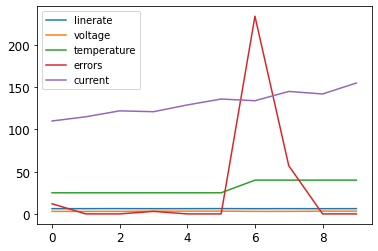

In [17]:
tests.plot();

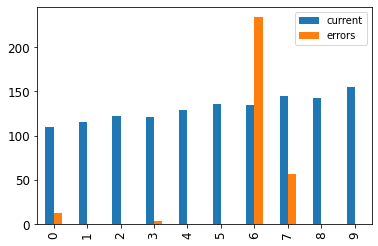

In [18]:
tests[["current", "errors"]].plot(kind="bar");

# `pivot_table`

In [19]:
tests

,linerate,voltage,temperature,errors,current,PASS,comment
0,6.20,3.0,25,12,110,False,
1,6.25,3.0,25,0,115,True,
2,6.30,3.0,25,0,122,True,
3,6.20,3.3,25,3,121,False,
4,6.25,3.3,25,0,129,True,
5,6.30,3.3,25,0,136,True,ESD event
6,6.20,3.0,40,234,134,False,
7,6.25,3.0,40,57,145,False,
8,6.20,3.3,40,0,142,True,
9,6.25,3.3,40,0,155,False,


In [20]:
tests.pivot_table(index="linerate", columns="temperature", values="current", 
                  aggfunc=np.mean, fill_value=None)

temperature,25,40
linerate,,
6.20,115.5,138.0
6.25,122.0,150.0
6.30,129.0,NaN


In [21]:
def plot_pivot_heatmap(df, columns, index, values):
    pt = df.pivot_table(columns=columns, index=index, values=values, aggfunc=np.mean)
    plt.figure(figsize=(5, 3))
    plt.imshow(pt.values, interpolation='nearest', aspect='auto', cmap=plt.cm.coolwarm)
    plt.yticks(range(len(pt.index)), pt.index)
    plt.xticks(range(len(pt.columns)), pt.columns)
    plt.xlabel(columns), plt.ylabel(index)
    plt.colorbar()

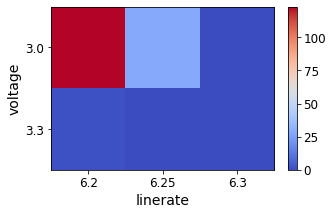

In [22]:
plot_pivot_heatmap(tests, index="voltage", columns="linerate", values="errors")

# Pandas Series

In [44]:
def download_wavetraces():
    import requests, io
    signals = []
    for name in ["rdqs", "dq"]:
        url = f"https://raw.githubusercontent.com/munich-ml/MLPy2021/main/datasets/wavetrace_{name}.dat"
        sio = io.StringIO(requests.get(url).content.decode('utf-8'))
        name += " [V]"
        df = pd.read_csv(sio, sep= " ", index_col=0, names=["time [s]", name])
        signals.append(df[name])  # index one colume from the DataFrame makes a Series
    return signals

In [45]:
signals = download_wavetraces()

In [46]:
import matplotlib.pyplot as plt

In [47]:
sig = next(iter(signals))

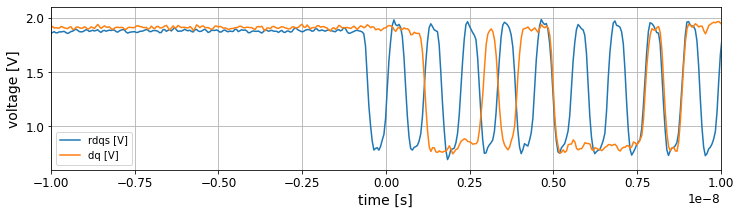

In [55]:
plt.figure(figsize=(12, 3))
for sig in signals:
    plt.plot(sig.index, sig, label=sig.name)
plt.xlabel(sig.index.name), plt.ylabel("voltage [V]")
plt.xlim((-1e-8, 1e-8))
plt.legend(), plt.grid();

# Options

See [pandas user guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html) for details on options.

### pd.options.display.precision

In [ ]:
df = pd.DataFrame(np.random.randn(5, 5))
df

,0,1,2,3,4
0,-0.654705,-0.188344,0.194944,-0.886505,-0.528163
1,-0.200325,1.239030,-0.523044,-2.529440,0.511811
2,0.906762,-0.638670,0.850540,0.031877,1.409961
3,0.826160,-0.209599,-0.622240,-1.820597,0.697129
4,-1.940481,-0.789461,-1.023777,0.873377,-1.137557


In [ ]:
pd.options.display.precision

6

In [ ]:
pd.options.display.precision = 3

In [ ]:
df

,0,1,2,3,4
0,-0.655,-0.188,0.195,-0.887,-0.528
1,-0.200,1.239,-0.523,-2.529,0.512
2,0.907,-0.639,0.851,0.032,1.410
3,0.826,-0.210,-0.622,-1.821,0.697
4,-1.940,-0.789,-1.024,0.873,-1.138


In [ ]:
pd.options.display.precision

3

### pd.reset_option("all")

In [ ]:
pd.reset_option("all")


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



/usr/local/lib/python3.7/dist-packages/pandas/_config/config.py:622: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


In [ ]:
pd.options.display.precision

6

### pd.options.display.float_format

In [ ]:
pd.options.display.float_format is None

True

In [ ]:
df

,0,1,2,3,4
0,-0.654705,-0.188344,0.194944,-0.886505,-0.528163
1,-0.200325,1.239030,-0.523044,-2.529440,0.511811
2,0.906762,-0.638670,0.850540,0.031877,1.409961
3,0.826160,-0.209599,-0.622240,-1.820597,0.697129
4,-1.940481,-0.789461,-1.023777,0.873377,-1.137557


In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
df

,0,1,2,3,4
0,-0.65,-0.19,0.19,-0.89,-0.53
1,-0.20,1.24,-0.52,-2.53,0.51
2,0.91,-0.64,0.85,0.03,1.41
3,0.83,-0.21,-0.62,-1.82,0.70
4,-1.94,-0.79,-1.02,0.87,-1.14


In [ ]:
pd.options.display.float_format = None
df

,0,1,2,3,4
0,-0.654705,-0.188344,0.194944,-0.886505,-0.528163
1,-0.200325,1.239030,-0.523044,-2.529440,0.511811
2,0.906762,-0.638670,0.850540,0.031877,1.409961
3,0.826160,-0.209599,-0.622240,-1.820597,0.697129
4,-1.940481,-0.789461,-1.023777,0.873377,-1.137557


In [ ]:
with pd.option_context('display.float_format', '{:,.2f}'.format):
    print(df)
print(df)

      0     1     2     3     4
0 -0.65 -0.19  0.19 -0.89 -0.53
1 -0.20  1.24 -0.52 -2.53  0.51
2  0.91 -0.64  0.85  0.03  1.41
3  0.83 -0.21 -0.62 -1.82  0.70
4 -1.94 -0.79 -1.02  0.87 -1.14
          0         1         2         3         4
0 -0.654705 -0.188344  0.194944 -0.886505 -0.528163
1 -0.200325  1.239030 -0.523044 -2.529440  0.511811
2  0.906762 -0.638670  0.850540  0.031877  1.409961
3  0.826160 -0.209599 -0.622240 -1.820597  0.697129
4 -1.940481 -0.789461 -1.023777  0.873377 -1.137557
